# Test Lotka-Voltera simulator

In [30]:
import numpy as np
import corner
from matplotlib import pyplot as plt
%matplotlib inline
import logging

from goldmine.simulators.lotka_volterra import LotkaVolterra

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')
logging.getLogger().setLevel(logging.INFO)

## Run simulation

In [31]:
simulator = LotkaVolterra()

In [45]:
theta0 = simulator.theta_defaults(single_theta=True)[0][0]
print(theta0)
theta1 = np.array([0.008, 0.4, 1.5, 0.01])

[0.01 0.5  1.   0.01]


In [33]:
x0, histories0 = simulator.rvs(theta0, 1000, return_histories=True)
x1, histories1 = simulator.rvs(theta1, 1000, return_histories=True)

14:07  Simulating 1000 evolutions for theta = [0.01 0.5  1.   0.01]
14:10  Too many steps in simulation. Total rate: 998200.0
14:13  Simulating 1000 evolutions for theta = [0.008 0.4   1.5   0.01 ]


## Plot predator and prey evolutions

In [36]:
t = np.linspace(0., 30., histories0[0].shape[0])
                
mean_histories0 = np.median(np.array(histories0), axis=0)
mean_histories1 = np.median(np.array(histories1), axis=0)

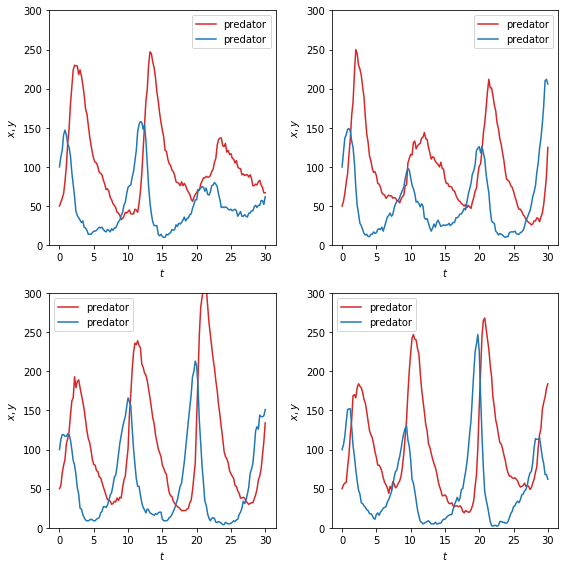

In [44]:
fig = plt.figure(figsize=(8,8))

for i in range(4):

    ax = plt.subplot(2,2,i+1)

    plt.plot(t, histories0[i][:,0], c='C3', lw=1.5, ls='-', label='predator')
    plt.plot(t, histories0[i][:,1], c='C0', lw=1.5, ls='-', label='predator')

    plt.legend()

    plt.xlabel(r'$t$')
    plt.ylabel(r'$x, y$')
    plt.ylim(0,300)

plt.tight_layout()
plt.show()

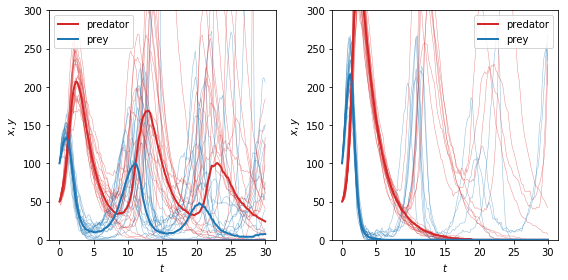

In [38]:
fig = plt.figure(figsize=(8,4))

for panel, (histories, mean_history) in enumerate(zip([histories0, histories1],
                                                    [mean_histories0, mean_histories1])):

    ax = plt.subplot(1,2,panel+1)

    for history in histories[:20]:
        plt.plot(t, history[:,0], c='C3', alpha=0.5, lw=0.5, ls='-')
        plt.plot(t, history[:,1], c='C0', alpha=0.5, lw=0.5, ls='-')
    plt.plot(t, mean_history[:,0], c='C3', lw=2., ls='-', label='predator')
    plt.plot(t, mean_history[:,1], c='C0', lw=2., ls='-', label='prey')

    plt.legend()

    plt.xlabel(r'$t$')
    plt.ylabel(r'$x, y$')
    plt.ylim(0,300)

plt.tight_layout()
plt.show()

## Summary statistics

14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too few points to create valid contours
14:31  Too fe

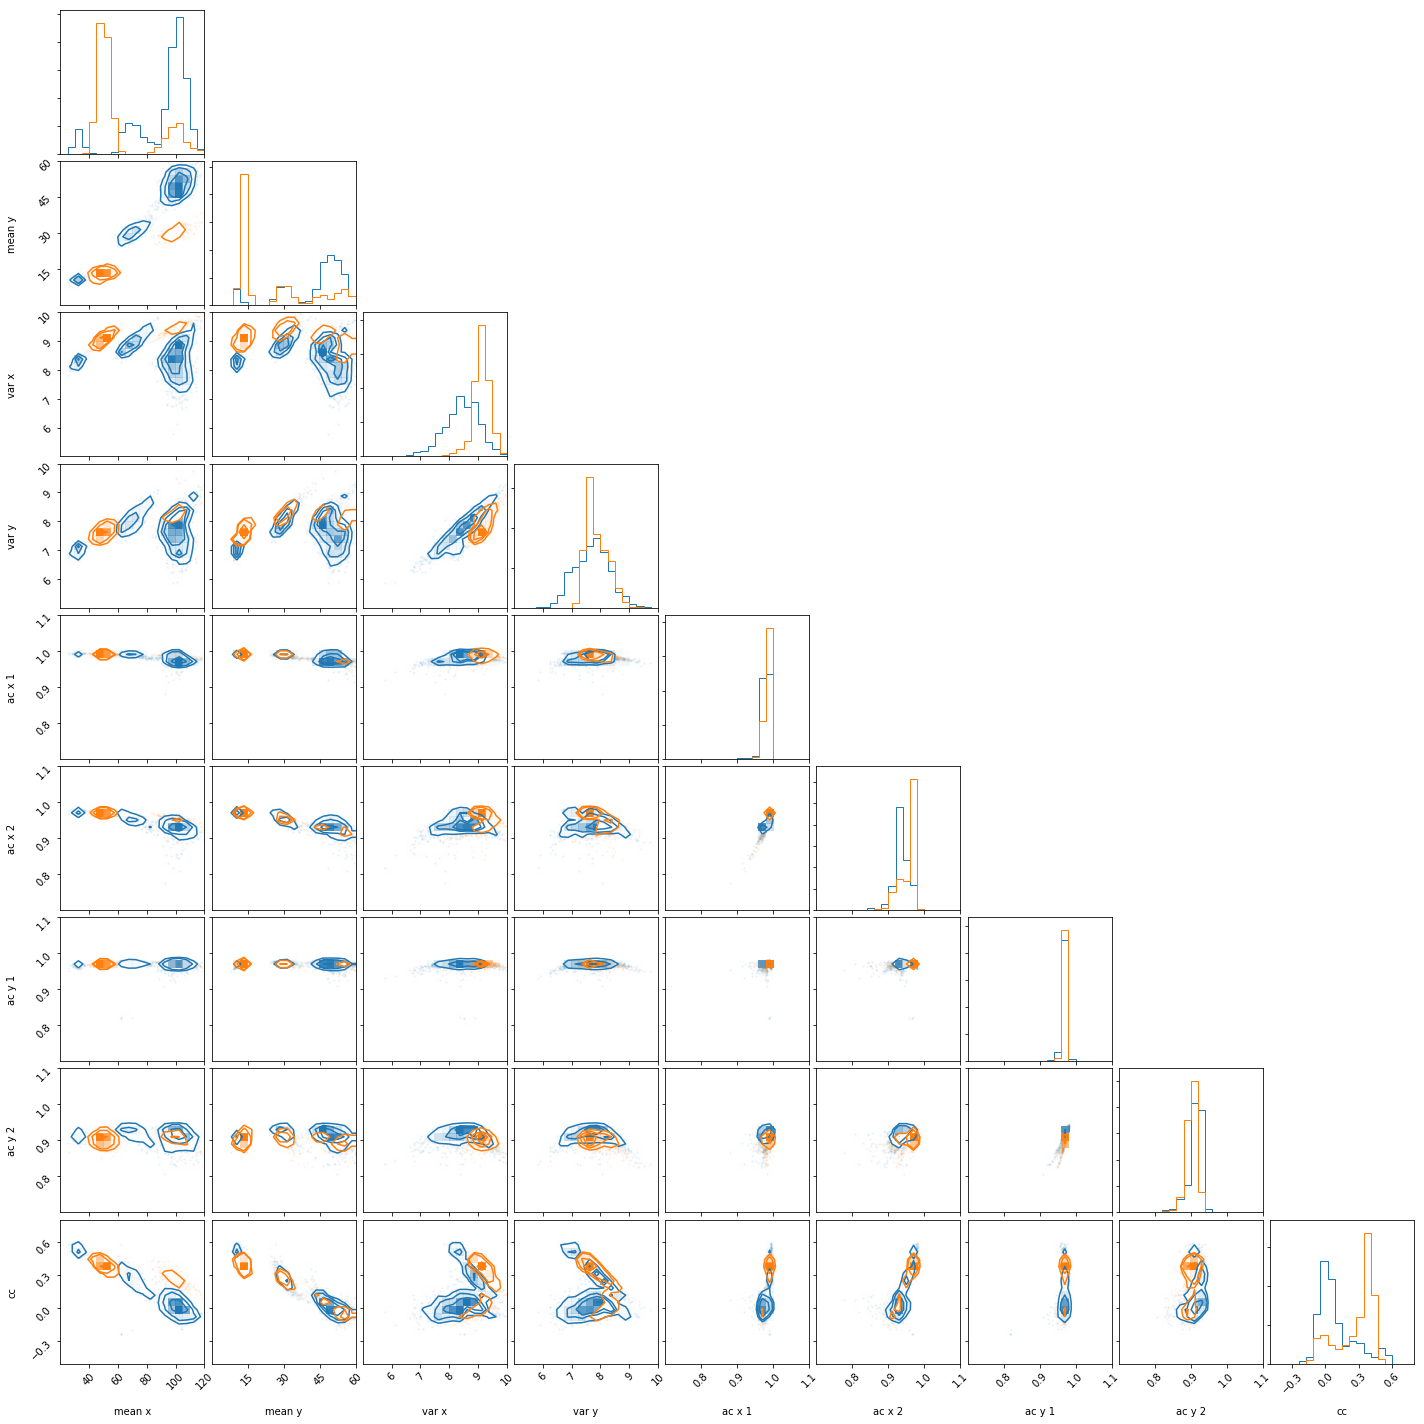

In [42]:
import corner

labels = [r'mean x', r'mean y', r'var x', r'var y', r'ac x 1', r'ac x 2', r'ac y 1', r'ac y 2', 'cc']
ranges = [(20.,120.), (0.,60.), (5.,10.), (5.,10.), (0.7,1.1), (0.7,1.1), (0.7,1.1), (0.7,1.1), (-.5,.8)]

fig = corner.corner(x0, color='C0', labels=labels, range=ranges)
_ = corner.corner(x1, color='C1', labels=labels, range=ranges, fig=fig)